<a href="https://colab.research.google.com/github/JJay1010/sw-team_project/blob/main/%ED%99%A9%ED%98%84%ED%83%9C/img_to_np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Try

In [ ]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os

label_folder = 'Training/라벨링데이터/'
raw_folder   = 'Training/원천데이터'
raw_files  = glob.glob(raw_folder + '/*.*')
print(raw_files[:10])

for idx, file in enumerate(raw_files[26255:]):
    img = cv2.imread(file)
    h, w, _ = img.shape
    
    if w != h:
        size = max(w, h)
        margin = (size - w) // 2 if w < h else (size - h) // 2
        output = cv2.copyMakeBorder(img, margin, margin, 0, 0, cv2.BORDER_CONSTANT, value=0)
        img = output
        
    img = cv2.resize(img, (224,224), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(file, img)
    
    if idx % 1000 == 0:
        print(idx)

#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!cd "/content/drive/MyDrive/ai/dog"

!unzip -qq "/content/drive/MyDrive/ai/dog/TS2_DOG_2.zip.001" -d '/content' 

In [1]:
tlabel=uploaded

NameError: ignored

In [ ]:
tsource_1=uploaded

In [ ]:
vlabel=uploaded

In [ ]:
vsource=uploaded

In [5]:
!mkdir skel/train
!cd '/content/skel/train' # 압축을 풀 폴더 경로
!unzip -qq '/content/TL2_DOG.zip' -d '/content/skel/train' # 압축파일 경로



mkdir: cannot create directory ‘skel/train’: No such file or directory
/bin/bash: line 0: cd: /content/skel/train: No such file or directory
unzip:  cannot find or open /content/TL2_DOG.zip, /content/TL2_DOG.zip.zip or /content/TL2_DOG.zip.ZIP.


# json 정보 뽑

In [3]:
!mkdir skel
!mkdir skel/trian

!cd '/content/skel/train'
!unzip -qq "/content/drive/MyDrive/ai/dog/TL2_DOG.zip" -d '/content/skel/train' 

/bin/bash: line 0: cd: /content/skel/train: No such file or directory


In [4]:
import glob
json_dir_path = '/content/skel/train'
json_path_list = sorted(glob.glob(json_dir_path+'/*'))

In [5]:
print(len(json_path_list))

113725


In [5]:
file_path_2 = json_path_list[82000:112000] # 7번 112000까지
print(len(file_path_2))
print(file_path_2[-1:])

30000
['/content/skel/train/D_62_20150520_IM_0028_NOR_Mu05_20211224_4231.json']


In [6]:
import json
file_name_1 = []
disease_1 = []
point_loc = []
for name in file_path_2:
  with open(name, 'r') as file:
      data = json.load(file)
      #print(type(data))
      #print(data)
      file_name_1.append(data["fileName"][:-5])
      disease_1.append(data['metadata']["Disease"])
      disease_1.append(data['metadata']["Disease-Name"])
      disease_1.append(data['metadata']["Position"])
      point_loc.append(data['annotations'][0]['points'])

# 이미지 뽑

In [2]:
!mkdir skel/7n
!cd '/content/skel/7n' 
!unzip -qq '/content/drive/MyDrive/ai/dog/7번.zip' -d '/content/skel/7n'


mkdir: cannot create directory ‘skel/7n’: File exists
replace /content/skel/7n/7번/D_62_20100922_CM_0020_NOR_Mu06_20211221_0295.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
img_path_t = '/content/skel/7n/7번'
img_path = '/content/skel/7n/7번/'

In [74]:
print(len(glob.glob(img_path_t + '/*')))

30000


In [8]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np

np_list = []

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES =True

for i in range(len(file_name_1)):
  test_img = Image.open(img_path+ file_name_1[i] +'.jpg').convert('1')
  #[[x,y], [w,h]] = point_loc[i]
  #cropped_img = test_img.crop((x, y, x+w, y+h))

  #cropped_img = cropped_img.convert('RGB')

  img = test_img.convert('RGB')

  img = img.resize((224,224))  #75 75
  np_img = np.array(img)
  np_list.append(np_img)

  #value.append(np_img)
  # value[0]: label, value[1]: 이미지의 RGB 데이터
  #train_set.append(value)





115


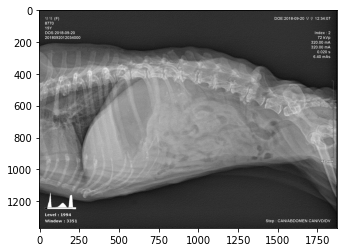

In [ ]:
nn = 'D_62_19990919_IF_0009_ABN_Mu07_20211209_0051'
#test_img = Image.open(img_path+ file_name_1[10]  +'.jpg').convert('1')
test_img = Image.open(img_path+ nn  +'.jpg').convert('1')

for i in range(len(file_name_1)):
  if file_name_1[i] == nn:
    print(i)

plt.imshow(test_img)
plt.show()

In [ ]:
print(len(file_name_1))
print(point_loc[115])

1000
[[771, 352], [1433, 628]]


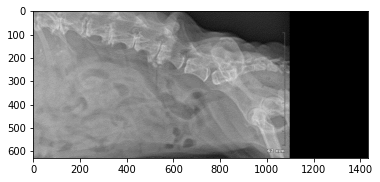

In [ ]:
[[x,y], [w,h]] =  [[771, 352], [1433, 628]]

cropped_img = test_img.crop((x, y, x+w, y+h))
plt.imshow(cropped_img)
plt.show()

# np_list local로 저장

In [70]:
np_lst_5 = np_list
print(len(np_lst_5))

30000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd "/content/drive/MyDrive/ai"

Mounted at /content/drive


In [9]:
!cd "/content/drive/MyDrive/ai/dog"
np.save("/content/drive/MyDrive/ai/dog_7",np_list) 
print('ㄴㄴ')

ㄴㄴ


# Network

In [ ]:
# train 생성

